# **Data Pre-Processing**

In [24]:
#loading dataset
import pandas as pd
df = pd.read_csv('/content/laptops.csv', encoding='ISO-8859-1')
df.head()


,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [25]:
import numpy as np

# Making new column based on price column
conditions = [
    (df['Price_euros'] < 900),
    (df['Price_euros'] >= 900)
]

choices = ['Small range', 'High range']

df['Budget'] = np.select(conditions, choices, default='Unknown')



In [26]:

# Drop the 'Price_euros' column
df = df.drop('Price_euros', axis=1)
df = df.drop('Unnamed: 0',axis=1)

In [27]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Budget
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,High range
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,Small range
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,Small range
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,High range
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,High range


In [28]:
#checking null values in dataset
df.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Budget              0
dtype: int64

#**Encoding**

In [29]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

df['Company'] = encoder.fit_transform(df[['Company']])
df['Product'] = encoder.fit_transform(df[['Product']])
df['TypeName'] = encoder.fit_transform(df[['TypeName']])
df['ScreenResolution'] = encoder.fit_transform(df[['ScreenResolution']])
df['Cpu'] = encoder.fit_transform(df[['Cpu']])
df['Ram'] = encoder.fit_transform(df[['Ram']])
df['Memory'] = encoder.fit_transform(df[['Memory']])
df['Gpu'] = encoder.fit_transform(df[['Gpu']])
df['OpSys'] = encoder.fit_transform(df[['OpSys']])
df['Budget'] = encoder.fit_transform(df[['Budget']])




In [30]:
# Remove 'kg' from the 'Weight' column
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)


In [31]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Budget
0,1.0,300.0,4.0,13.3,23.0,65.0,8.0,4.0,58.0,8.0,1.37,0.0
1,1.0,301.0,4.0,13.3,1.0,63.0,8.0,2.0,51.0,8.0,1.34,1.0
2,7.0,50.0,3.0,15.6,8.0,74.0,8.0,16.0,53.0,4.0,1.86,1.0
3,1.0,300.0,4.0,15.4,25.0,85.0,1.0,29.0,9.0,8.0,1.83,0.0
4,1.0,300.0,4.0,13.3,23.0,67.0,8.0,16.0,59.0,8.0,1.37,0.0


In [32]:
df.tail()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Budget
1298,10.0,580.0,0.0,14.0,13.0,89.0,5.0,4.0,47.0,5.0,1.80,1.0
1299,10.0,588.0,0.0,13.3,19.0,89.0,1.0,29.0,47.0,5.0,1.30,0.0
1300,10.0,196.0,3.0,14.0,0.0,34.0,3.0,35.0,40.0,5.0,1.50,1.0
1301,7.0,2.0,3.0,15.6,0.0,89.0,7.0,10.0,21.0,5.0,2.19,1.0
1302,2.0,568.0,3.0,15.6,0.0,34.0,5.0,26.0,40.0,5.0,2.20,1.0


In [33]:
x = df.drop(['Budget'], axis=1)
y= df['Budget']

# **Train and testing**

In [34]:

#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=91)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knnmodel=KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(X_train,y_train)
y_predict1=knnmodel.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix


acc = accuracy_score(y_test, y_predict1)
print(f'Accuracy: {acc}')

precision = precision_score(y_test, y_predict1, average='weighted')
print(f'Precision: {precision}')

recall = recall_score(y_test, y_predict1, average='weighted')
print(f'Recall: {recall}')

f1 = f1_score(y_test, y_predict1, average='weighted')
print(f'F1 Score: {f1}')
print("confusion_matrix ")
con = confusion_matrix(y_test, y_predict1)
print(con)

Accuracy: 0.9003831417624522
Precision: 0.9019408940285386
Recall: 0.9003831417624522
F1 Score: 0.8997997997997998
confusion_matrix 
[[137   8]
 [ 18  98]]


In [37]:
Ks=100
mean_acc=np.zeros((Ks-1))


#train and predict
for n in range(1,Ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=accuracy_score(y_test,yhat)

In [38]:
print(mean_acc)

[0.89655172 0.88888889 0.90038314 0.88888889 0.8697318  0.87739464
 0.8697318  0.87739464 0.87356322 0.87356322 0.87356322 0.86590038
 0.8697318  0.85823755 0.86206897 0.86206897 0.85823755 0.85823755
 0.85440613 0.85440613 0.85440613 0.85440613 0.85823755 0.85440613
 0.85823755 0.85440613 0.86206897 0.86206897 0.86206897 0.86206897
 0.85823755 0.85057471 0.85823755 0.85823755 0.85057471 0.85057471
 0.8467433  0.8467433  0.85440613 0.85440613 0.85057471 0.84291188
 0.8467433  0.84291188 0.83141762 0.83141762 0.83141762 0.83141762
 0.83141762 0.83908046 0.83141762 0.82758621 0.82375479 0.83141762
 0.82758621 0.82758621 0.83141762 0.83524904 0.83524904 0.83141762
 0.83141762 0.83141762 0.83141762 0.82758621 0.82375479 0.81992337
 0.82375479 0.82375479 0.82375479 0.81992337 0.81992337 0.82375479
 0.82375479 0.82375479 0.82375479 0.82375479 0.82758621 0.82375479
 0.82758621 0.81992337 0.82375479 0.83141762 0.82758621 0.83141762
 0.82375479 0.83141762 0.82758621 0.83141762 0.83141762 0.8314

In [39]:

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.9003831417624522 with k= 3


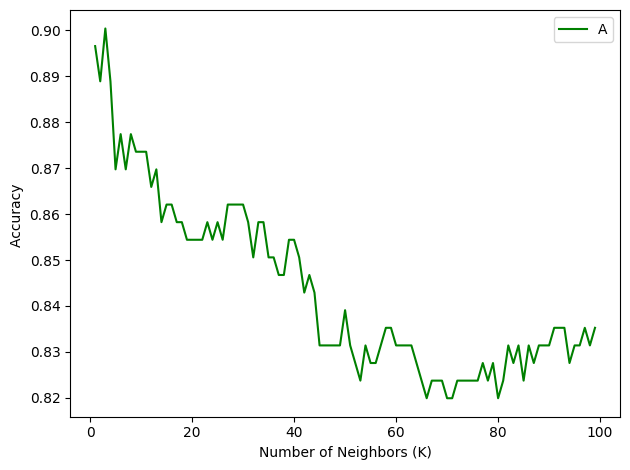

In [41]:
import matplotlib.pyplot as plt
plt.plot(range(1,Ks),mean_acc,'g')
plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

# **Naive Bayes**

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)

naive_bayes_model = GaussianNB()

naive_bayes_model.fit(X_train, y_train)

y_pred = naive_bayes_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')
print("confusion_matrix ")
con = confusion_matrix(y_test,y_pred)
print(con)

Accuracy: 0.7701149425287356
Precision: 0.7752427315753888
Recall: 0.7701149425287356
F1 Score: 0.7710536375793638
confusion_matrix 
[[112  36]
 [ 24  89]]


# **Decision Classifier**

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

decision_classifier = DecisionTreeClassifier()

decision_classifier.fit(X_train, y_train)

y_pred = decision_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

print(f'Accuracy: {accuracy}')
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')
print("confusion_matrix ")
con = confusion_matrix(y_test,y_pred)
print(con)



Accuracy: 0.8850574712643678
Accuracy: 0.8850574712643678
Precision: 0.8864308105687415
Recall: 0.8850574712643678
F1 Score: 0.8849087221095335
confusion_matrix 
[[121  11]
 [ 19 110]]


# **Random Forest classifier**

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=91)

#35 n_estimator is best fit

random_forest_classifier = RandomForestClassifier(n_estimators=35, random_state=28)

random_forest_classifier.fit(X_train, y_train)

y_pred = random_forest_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Random Forest Classifier Accuracy: {accuracy}')

print(f'Accuracy: {accuracy}')
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')
print("confusion_matrix ")
con = confusion_matrix(y_test,y_pred)
print(con)


Random Forest Classifier Accuracy: 0.9118773946360154
Accuracy: 0.9118773946360154
Precision: 0.9125556628574495
Recall: 0.9118773946360154
F1 Score: 0.9115450804339694
confusion_matrix 
[[137   8]
 [ 15 101]]


In [45]:
#hyper parameter tunning
for i in range(1,100):
  t=[]#storing all accuracy to find max accuracy
  random_forest_classifier = RandomForestClassifier(n_estimators=35, random_state=i)

  random_forest_classifier.fit(X_train, y_train)

  y_pred = random_forest_classifier.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  t.append(accuracy)
  print(f'Random Forest Classifier Accuracy: {accuracy}')


Random Forest Classifier Accuracy: 0.9042145593869731
Random Forest Classifier Accuracy: 0.9080459770114943
Random Forest Classifier Accuracy: 0.9272030651340997
Random Forest Classifier Accuracy: 0.9003831417624522
Random Forest Classifier Accuracy: 0.9118773946360154
Random Forest Classifier Accuracy: 0.9157088122605364
Random Forest Classifier Accuracy: 0.9118773946360154
Random Forest Classifier Accuracy: 0.9118773946360154
Random Forest Classifier Accuracy: 0.9310344827586207
Random Forest Classifier Accuracy: 0.9118773946360154
Random Forest Classifier Accuracy: 0.9003831417624522
Random Forest Classifier Accuracy: 0.9003831417624522
Random Forest Classifier Accuracy: 0.9233716475095786
Random Forest Classifier Accuracy: 0.9003831417624522
Random Forest Classifier Accuracy: 0.9118773946360154
Random Forest Classifier Accuracy: 0.9042145593869731
Random Forest Classifier Accuracy: 0.9157088122605364
Random Forest Classifier Accuracy: 0.9080459770114943
Random Forest Classifier Acc

In [46]:
mx_ind = t.index(max(t))
print(mx_ind)

0


In [47]:
max(t)

0.9118773946360154

In [48]:
for i in range(1,100):
  t=[]#storing all accuracy to find max accuracy
  random_forest_classifier = RandomForestClassifier(n_estimators=i, random_state=28)

  random_forest_classifier.fit(X_train, y_train)

  y_pred = random_forest_classifier.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  t.append(accuracy)
  print(f'Random Forest Classifier Accuracy: {accuracy}')


Random Forest Classifier Accuracy: 0.8850574712643678
Random Forest Classifier Accuracy: 0.8659003831417624
Random Forest Classifier Accuracy: 0.8773946360153256
Random Forest Classifier Accuracy: 0.8850574712643678
Random Forest Classifier Accuracy: 0.9003831417624522
Random Forest Classifier Accuracy: 0.8888888888888888
Random Forest Classifier Accuracy: 0.9042145593869731
Random Forest Classifier Accuracy: 0.9042145593869731
Random Forest Classifier Accuracy: 0.9042145593869731
Random Forest Classifier Accuracy: 0.9042145593869731
Random Forest Classifier Accuracy: 0.9042145593869731
Random Forest Classifier Accuracy: 0.896551724137931
Random Forest Classifier Accuracy: 0.9080459770114943
Random Forest Classifier Accuracy: 0.9042145593869731
Random Forest Classifier Accuracy: 0.89272030651341
Random Forest Classifier Accuracy: 0.9003831417624522
Random Forest Classifier Accuracy: 0.896551724137931
Random Forest Classifier Accuracy: 0.9042145593869731
Random Forest Classifier Accurac

# **After scaling X_train and X_test then checking accuracy**

#**Naive Bayes**

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)


naive_bayes_model = GaussianNB()

naive_bayes_model.fit(X_train_scaled, y_train)

y_pred = naive_bayes_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

print(f'Accuracy: {accuracy}')
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')
print("confusion_matrix ")
con = confusion_matrix(y_test,y_pred)
print(con)

Accuracy: 0.7701149425287356
Accuracy: 0.7701149425287356
Precision: 0.7752427315753888
Recall: 0.7701149425287356
F1 Score: 0.7710536375793638
confusion_matrix 
[[112  36]
 [ 24  89]]


#**Decsion tree**

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

decision_classifier = DecisionTreeClassifier()

decision_classifier.fit(X_train_scaled, y_train)

y_pred = decision_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

print(f'Accuracy: {accuracy}')
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')

print("confusion_matrix ")
con = confusion_matrix(y_test,y_pred)
print(con)

Accuracy: 0.8888888888888888
Accuracy: 0.8888888888888888
Precision: 0.889943782678775
Recall: 0.8888888888888888
F1 Score: 0.8887745451159691
confusion_matrix 
[[121  11]
 [ 18 111]]


#**SVM**

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

svm_classifier = SVC()

svm_classifier.fit(X_train_scaled, y_train)

y_pred = svm_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)


print(f'Accuracy: {accuracy}')
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')
print("confusion_matrix ")
con = confusion_matrix(y_test,y_pred)
print(con)

Accuracy: 0.9080459770114943
Precision: 0.9086405073325406
Recall: 0.9080459770114943
F1 Score: 0.9078582380013686
confusion_matrix 
[[130   9]
 [ 15 107]]


#**KNN**

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=3)

knn_classifier.fit(X_train_scaled, y_train)

y_pred = knn_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')
print("confusion_matrix ")
con = confusion_matrix(y_test,y_pred)
print(con)


Accuracy: 0.9425287356321839
Precision: 0.9425260215228867
Recall: 0.9425287356321839
F1 Score: 0.9425134770992308
confusion_matrix 
[[132   7]
 [  8 114]]


In [57]:
Ks=200
mean_acc=np.zeros((Ks-1))


#train and predict
for n in range(1,Ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train_scaled,y_train)
    yhat=neigh.predict(X_test_scaled)
    mean_acc[n-1]=accuracy_score(y_test,yhat)

In [58]:

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.9425287356321839 with k= 3


#**By using 3 target variable**

In [59]:
#loading dataset
import pandas as pd
df1 = pd.read_csv('/content/laptops.csv', encoding='ISO-8859-1')
df1.head()


,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [60]:
#making new column based on price column
import numpy as np

# Making new column based on price column
df1['Budget'] = np.where(df1['Price_euros'] < 700, 'Small range',
                        np.where((df1['Price_euros'] >= 700) & (df1['Price_euros'] < 1300), 'Mid range', 'High range'))



In [61]:
#making new column
# Drop the 'Price_euros' column
df1 = df1.drop('Price_euros', axis=1)
df1 = df1.drop('Unnamed: 0',axis=1)

#  **Encoding**

In [62]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

df1['Company'] = encoder.fit_transform(df1[['Company']])
df1['Product'] = encoder.fit_transform(df1[['Product']])
df1['TypeName'] = encoder.fit_transform(df1[['TypeName']])
df1['ScreenResolution'] = encoder.fit_transform(df1[['ScreenResolution']])
df1['Cpu'] = encoder.fit_transform(df1[['Cpu']])
df1['Ram'] = encoder.fit_transform(df1[['Ram']])
df1['Memory'] = encoder.fit_transform(df1[['Memory']])
df1['Gpu'] = encoder.fit_transform(df1[['Gpu']])
df1['OpSys'] = encoder.fit_transform(df1[['OpSys']])
df1['Budget'] = encoder.fit_transform(df1[['Budget']])




In [63]:
# #using label encoder
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# df1['Company'] = encoder.fit_transform(df1[['Company']])
# df1['Product'] = encoder.fit_transform(df1[['Product']])
# df1['TypeName'] = encoder.fit_transform(df1[['TypeName']])
# df1['ScreenResolution'] = encoder.fit_transform(df1[['ScreenResolution']])
# df1['Cpu'] = encoder.fit_transform(df1[['Cpu']])
# df1['Ram'] = encoder.fit_transform(df1[['Ram']])
# df1['Memory'] = encoder.fit_transform(df1[['Memory']])
# df1['Gpu'] = encoder.fit_transform(df1[['Gpu']])
# df1['OpSys'] = encoder.fit_transform(df1[['OpSys']])
# df1['Budget'] = encoder.fit_transform(df1[['Budget']])


In [64]:
# Remove 'kg' from the 'Weight' column
df1['Weight'] = df1['Weight'].str.replace('kg', '').astype(float)


In [65]:
df1.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Budget
0,1.0,300.0,4.0,13.3,23.0,65.0,8.0,4.0,58.0,8.0,1.37,0.0
1,1.0,301.0,4.0,13.3,1.0,63.0,8.0,2.0,51.0,8.0,1.34,1.0
2,7.0,50.0,3.0,15.6,8.0,74.0,8.0,16.0,53.0,4.0,1.86,2.0
3,1.0,300.0,4.0,15.4,25.0,85.0,1.0,29.0,9.0,8.0,1.83,0.0
4,1.0,300.0,4.0,13.3,23.0,67.0,8.0,16.0,59.0,8.0,1.37,0.0


In [66]:
x = df1.drop(['Budget'], axis=1)
y= df1['Budget']

In [67]:

#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=5)


In [68]:
np.sqrt(X_train.shape[0])


32.28002478313795

In [71]:
# max_ind = b.index(max(b))


In [72]:
# b[max_ind]

# **KNN**

In [75]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=94)
knnmodel=KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(X_train,y_train)
y_predict1=knnmodel.predict(X_test)

In [76]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_predict1)
print(acc)


print(f'Accuracy: {accuracy}')
precision = precision_score(y_test, y_predict1, average='weighted')
print(f'Precision: {precision}')

recall = recall_score(y_test, y_predict1, average='weighted')
print(f'Recall: {recall}')

f1 = f1_score(y_test, y_predict1, average='weighted')
print(f'F1 Score: {f1}')


0.842911877394636
Accuracy: 0.9425287356321839
Precision: 0.8469966845629219
Recall: 0.842911877394636
F1 Score: 0.8412882020998399


In [ ]:
Ks=200
mean_acc=np.zeros((Ks-1))


#train and predict
for n in range(1,Ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=accuracy_score(y_test,yhat)

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)


The best accuracy was with 0.8007662835249042 with k= 5


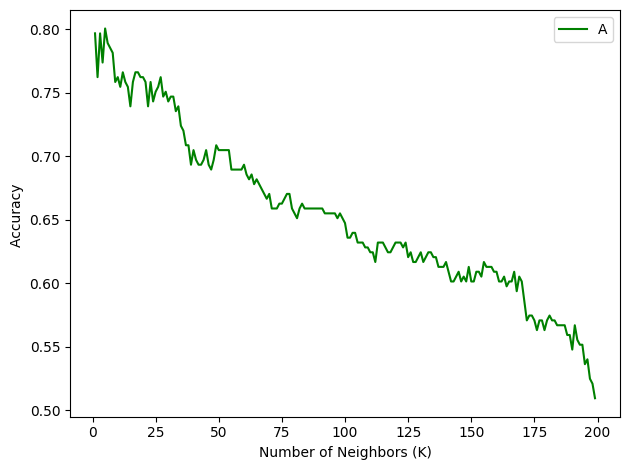

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1,Ks),mean_acc,'g')
plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
#by changing value of random state in the range of 1-100
b=[]
for i in range(1,100):
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=91)

  scaler = StandardScaler()

  X_train_scaled = scaler.fit_transform(X_train)

  X_test_scaled = scaler.transform(X_test)

  knn_classifier = KNeighborsClassifier(n_neighbors=i)

  knn_classifier.fit(X_train_scaled, y_train)

  y_pred = knn_classifier.predict(X_test_scaled)

  accuracy = accuracy_score(y_test, y_pred)
  b.append(accuracy)
  print(f'Accuracy: {accuracy}')


Accuracy: 0.8237547892720306
Accuracy: 0.8007662835249042
Accuracy: 0.8544061302681992
Accuracy: 0.7969348659003831
Accuracy: 0.8275862068965517
Accuracy: 0.8199233716475096
Accuracy: 0.8237547892720306
Accuracy: 0.8237547892720306
Accuracy: 0.8160919540229885
Accuracy: 0.8160919540229885
Accuracy: 0.8007662835249042
Accuracy: 0.8007662835249042
Accuracy: 0.7816091954022989
Accuracy: 0.7969348659003831
Accuracy: 0.7816091954022989
Accuracy: 0.7854406130268199
Accuracy: 0.7854406130268199
Accuracy: 0.7854406130268199
Accuracy: 0.7777777777777778
Accuracy: 0.7816091954022989
Accuracy: 0.789272030651341
Accuracy: 0.7816091954022989
Accuracy: 0.7854406130268199
Accuracy: 0.7816091954022989
Accuracy: 0.7854406130268199
Accuracy: 0.789272030651341
Accuracy: 0.7777777777777778
Accuracy: 0.7854406130268199
Accuracy: 0.7816091954022989
Accuracy: 0.7854406130268199
Accuracy: 0.7854406130268199
Accuracy: 0.7854406130268199
Accuracy: 0.7662835249042146
Accuracy: 0.7777777777777778
Accuracy: 0.7816

In [ ]:
#best value of random_state when neighbour is 3
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=91)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=3)

knn_classifier.fit(X_train_scaled, y_train)

y_pred = knn_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
b.append(accuracy)
print(f'Accuracy: {accuracy}')

precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')


Accuracy: 0.8544061302681992
Precision: 0.8546451306906186
Recall: 0.8544061302681992
F1 Score: 0.853900888383647


# **Decision Tree**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
a=[]
for i in range(1,100):
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)

  decision_classifier = DecisionTreeClassifier()

  decision_classifier.fit(X_train, y_train)

  y_pred = decision_classifier.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  a.append(accuracy)
  print(f'Accuracy: {accuracy}')



Accuracy: 0.8122605363984674
Accuracy: 0.8084291187739464
Accuracy: 0.7739463601532567
Accuracy: 0.789272030651341
Accuracy: 0.8275862068965517
Accuracy: 0.8160919540229885
Accuracy: 0.8237547892720306
Accuracy: 0.8122605363984674
Accuracy: 0.7854406130268199
Accuracy: 0.7816091954022989
Accuracy: 0.7931034482758621
Accuracy: 0.7931034482758621
Accuracy: 0.7931034482758621
Accuracy: 0.7931034482758621
Accuracy: 0.7777777777777778
Accuracy: 0.8007662835249042
Accuracy: 0.7969348659003831
Accuracy: 0.7816091954022989
Accuracy: 0.8160919540229885
Accuracy: 0.8122605363984674
Accuracy: 0.7969348659003831
Accuracy: 0.8314176245210728
Accuracy: 0.8084291187739464
Accuracy: 0.8314176245210728
Accuracy: 0.8045977011494253
Accuracy: 0.8007662835249042
Accuracy: 0.7931034482758621
Accuracy: 0.7701149425287356
Accuracy: 0.7777777777777778
Accuracy: 0.7662835249042146
Accuracy: 0.7624521072796935
Accuracy: 0.7662835249042146
Accuracy: 0.7816091954022989
Accuracy: 0.8007662835249042
Accuracy: 0.766

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=91)

decision_classifier = DecisionTreeClassifier()

decision_classifier.fit(X_train, y_train)

y_pred = decision_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')


Accuracy: 0.8314176245210728
Precision: 0.8340614336095905
Recall: 0.8314176245210728
F1 Score: 0.8321773049386442


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=91)

decision_classifier = DecisionTreeClassifier(
    criterion='gini',    # or 'entropy'
    splitter='best',     # or 'random'
    max_depth=9,      # or a specific integer
    min_samples_split=2, # or another integer
    min_samples_leaf=1   # or another integer
)

decision_classifier.fit(X_train, y_train)

y_pred = decision_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')


Accuracy: 0.8390804597701149
Precision: 0.8426612237937636
Recall: 0.8390804597701149
F1 Score: 0.840182026379597


In [ ]:
#calculating value of decsion tree after scaling the value
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=91)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

decision_classifier = DecisionTreeClassifier(
    criterion='gini',    # or 'entropy'
    splitter='best',     # or 'random'
    max_depth=9,
    min_samples_split=2,
    min_samples_leaf=1
)

decision_classifier.fit(X_train_scaled, y_train)

y_pred = decision_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')



Accuracy: 0.8390804597701149
Precision: 0.8426612237937636
Recall: 0.8390804597701149
F1 Score: 0.840182026379597


In [ ]:
#moving with dession tree by doing its hyper paramerter tunning
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=91)
for i in range(5,30):
  decision_classifier = DecisionTreeClassifier(max_depth=i, random_state=28)

  decision_classifier.fit(X_train, y_train)

  y_pred = decision_classifier.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f'Accuracy: {accuracy}')

Accuracy: 0.8467432950191571
Accuracy: 0.8314176245210728
Accuracy: 0.8275862068965517
Accuracy: 0.842911877394636
Accuracy: 0.8352490421455939
Accuracy: 0.8467432950191571
Accuracy: 0.842911877394636
Accuracy: 0.8390804597701149
Accuracy: 0.8352490421455939
Accuracy: 0.842911877394636
Accuracy: 0.8390804597701149
Accuracy: 0.8352490421455939
Accuracy: 0.8390804597701149
Accuracy: 0.8390804597701149
Accuracy: 0.8352490421455939
Accuracy: 0.8390804597701149
Accuracy: 0.8390804597701149
Accuracy: 0.8352490421455939
Accuracy: 0.8390804597701149
Accuracy: 0.8352490421455939
Accuracy: 0.8390804597701149
Accuracy: 0.8352490421455939
Accuracy: 0.8390804597701149
Accuracy: 0.8467432950191571
Accuracy: 0.842911877394636
Accuracy: 0.8352490421455939
Accuracy: 0.842911877394636
Accuracy: 0.8467432950191571
Accuracy: 0.8314176245210728
Accuracy: 0.8352490421455939
Accuracy: 0.8352490421455939
Accuracy: 0.8390804597701149
Accuracy: 0.842911877394636
Accuracy: 0.8390804597701149
Accuracy: 0.83524904

In [ ]:
  decision_classifier = DecisionTreeClassifier(max_depth=9, random_state=28)

  decision_classifier.fit(X_train, y_train)

  y_pred = decision_classifier.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print("accuracy :",accuracy)

accuracy : 0.8467432950191571


# **trying multiple algorithm to check accuracy**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train multiple classifiers
rf_classifier = RandomForestClassifier()
svm_classifier = SVC()
knn_classifier = KNeighborsClassifier()
dt_classifier = DecisionTreeClassifier()
lr_classifier = LogisticRegression()

classifiers = [rf_classifier, svm_classifier, knn_classifier, dt_classifier, lr_classifier]

for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{classifier.__class__.__name__} Accuracy: {accuracy}')


RandomForestClassifier Accuracy: 0.8467432950191571
SVC Accuracy: 0.5977011494252874
KNeighborsClassifier Accuracy: 0.7126436781609196
DecisionTreeClassifier Accuracy: 0.7586206896551724
LogisticRegression Accuracy: 0.6628352490421456


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Random Forest Classifier**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=91)
l=[] #store each iteration score
#35 n_estimator is best fit
for i in range(30,100):
  random_forest_classifier = RandomForestClassifier(n_estimators=i, random_state=91)

  random_forest_classifier.fit(X_train, y_train)

  y_pred = random_forest_classifier.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)

  print(f'Random Forest Classifier Accuracy: {accuracy}')


Random Forest Classifier Accuracy: 0.8812260536398467
Random Forest Classifier Accuracy: 0.8888888888888888
Random Forest Classifier Accuracy: 0.8850574712643678
Random Forest Classifier Accuracy: 0.8850574712643678
Random Forest Classifier Accuracy: 0.8888888888888888
Random Forest Classifier Accuracy: 0.89272030651341
Random Forest Classifier Accuracy: 0.8888888888888888
Random Forest Classifier Accuracy: 0.89272030651341
Random Forest Classifier Accuracy: 0.8888888888888888
Random Forest Classifier Accuracy: 0.8888888888888888
Random Forest Classifier Accuracy: 0.8812260536398467
Random Forest Classifier Accuracy: 0.8850574712643678
Random Forest Classifier Accuracy: 0.8888888888888888
Random Forest Classifier Accuracy: 0.8850574712643678
Random Forest Classifier Accuracy: 0.8888888888888888
Random Forest Classifier Accuracy: 0.8850574712643678
Random Forest Classifier Accuracy: 0.8773946360153256
Random Forest Classifier Accuracy: 0.8735632183908046
Random Forest Classifier Accurac

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#hyper parameter tunnning
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=91)
l=[]
#35 n_estimator is best fit
for i in range(1,100):
  random_forest_classifier = RandomForestClassifier(n_estimators=35, random_state=i)

  random_forest_classifier.fit(X_train, y_train)

  y_pred = random_forest_classifier.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  l.append(accuracy)
  print(f'Random Forest Classifier Accuracy: {accuracy}')


Random Forest Classifier Accuracy: 0.8582375478927203
Random Forest Classifier Accuracy: 0.8620689655172413
Random Forest Classifier Accuracy: 0.8697318007662835
Random Forest Classifier Accuracy: 0.8505747126436781
Random Forest Classifier Accuracy: 0.8812260536398467
Random Forest Classifier Accuracy: 0.8812260536398467
Random Forest Classifier Accuracy: 0.8659003831417624
Random Forest Classifier Accuracy: 0.8620689655172413
Random Forest Classifier Accuracy: 0.8850574712643678
Random Forest Classifier Accuracy: 0.8659003831417624
Random Forest Classifier Accuracy: 0.89272030651341
Random Forest Classifier Accuracy: 0.8582375478927203
Random Forest Classifier Accuracy: 0.8850574712643678
Random Forest Classifier Accuracy: 0.89272030651341
Random Forest Classifier Accuracy: 0.89272030651341
Random Forest Classifier Accuracy: 0.8850574712643678
Random Forest Classifier Accuracy: 0.8850574712643678
Random Forest Classifier Accuracy: 0.8620689655172413
Random Forest Classifier Accuracy:

In [ ]:
max_ind =  l.index(max(l))

In [ ]:
max_ind

27

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
l1=[]
for i in range(1,100):

  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)

  #35 n_estimator is best fit

  random_forest_classifier = RandomForestClassifier(n_estimators=35, random_state=28)

  random_forest_classifier.fit(X_train, y_train)

  y_pred = random_forest_classifier.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  l1.append(accuracy)
  print(f'Random Forest Classifier Accuracy: {accuracy}')


Random Forest Classifier Accuracy: 0.8735632183908046
Random Forest Classifier Accuracy: 0.8812260536398467
Random Forest Classifier Accuracy: 0.8084291187739464
Random Forest Classifier Accuracy: 0.8620689655172413
Random Forest Classifier Accuracy: 0.8773946360153256
Random Forest Classifier Accuracy: 0.8697318007662835
Random Forest Classifier Accuracy: 0.8620689655172413
Random Forest Classifier Accuracy: 0.8007662835249042
Random Forest Classifier Accuracy: 0.8199233716475096
Random Forest Classifier Accuracy: 0.8544061302681992
Random Forest Classifier Accuracy: 0.8352490421455939
Random Forest Classifier Accuracy: 0.8505747126436781
Random Forest Classifier Accuracy: 0.8237547892720306
Random Forest Classifier Accuracy: 0.8237547892720306
Random Forest Classifier Accuracy: 0.8467432950191571
Random Forest Classifier Accuracy: 0.8544061302681992
Random Forest Classifier Accuracy: 0.8352490421455939
Random Forest Classifier Accuracy: 0.8467432950191571
Random Forest Classifier Acc

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=91)

#35 n_estimator is best fit

random_forest_classifier = RandomForestClassifier(n_estimators=35, random_state=28)

random_forest_classifier.fit(X_train, y_train)

y_pred = random_forest_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Random Forest Classifier Accuracy: {accuracy}')
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')



Random Forest Classifier Accuracy: 0.9003831417624522
Precision: 0.9017175337486942
Recall: 0.9003831417624522
F1 Score: 0.9008279808666254


In [ ]:
import joblib

joblib.dump(random_forest_classifier, 'random_forest_model_classifier.joblib')

['random_forest_model_classifier.joblib']

In [ ]:
y_test.unique()

array([2., 1., 0.])

# **Naive Bayes**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
l1=[] #this list store all accuracy
for i in range(1,100):
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)

  naive_bayes_model = GaussianNB()

  naive_bayes_model.fit(X_train, y_train)

  y_pred = naive_bayes_model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  l1.append(accuracy)
  print(f'Accuracy: {accuracy}')


Accuracy: 0.7203065134099617
Accuracy: 0.6896551724137931
Accuracy: 0.6934865900383141
Accuracy: 0.6973180076628352
Accuracy: 0.7203065134099617
Accuracy: 0.6896551724137931
Accuracy: 0.6973180076628352
Accuracy: 0.6896551724137931
Accuracy: 0.6590038314176245
Accuracy: 0.6781609195402298
Accuracy: 0.6934865900383141
Accuracy: 0.7241379310344828
Accuracy: 0.6551724137931034
Accuracy: 0.6628352490421456
Accuracy: 0.735632183908046
Accuracy: 0.7318007662835249
Accuracy: 0.6973180076628352
Accuracy: 0.7011494252873564
Accuracy: 0.735632183908046
Accuracy: 0.685823754789272
Accuracy: 0.685823754789272
Accuracy: 0.7088122605363985
Accuracy: 0.6590038314176245
Accuracy: 0.6973180076628352
Accuracy: 0.685823754789272
Accuracy: 0.7547892720306514
Accuracy: 0.685823754789272
Accuracy: 0.7203065134099617
Accuracy: 0.6743295019157088
Accuracy: 0.6973180076628352
Accuracy: 0.7011494252873564
Accuracy: 0.6590038314176245
Accuracy: 0.6781609195402298
Accuracy: 0.6436781609195402
Accuracy: 0.73946360

In [ ]:
max_ind = l1.index(max(l1))
print("max index is ",max_ind)

max index is  76


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=77)

naive_bayes_model = GaussianNB()

naive_bayes_model.fit(X_train, y_train)

y_pred = naive_bayes_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')



Accuracy: 0.7777777777777778
Precision: 0.7786049336890729
Recall: 0.7777777777777778
F1 Score: 0.7774462359082862


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

naive_bayes_model = GaussianNB()

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid_search = GridSearchCV(naive_bayes_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

best_naive_bayes_model = GaussianNB(var_smoothing=best_params['var_smoothing'])

best_naive_bayes_model.fit(X_train, y_train)

y_pred = best_naive_bayes_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Best Accuracy: {accuracy}')


Best Accuracy: 0.7203065134099617


In [ ]:
print(best_naive_bayes_model)

GaussianNB(var_smoothing=1e-05)


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

naive_bayes_model = GaussianNB()

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid_search = GridSearchCV(naive_bayes_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

best_naive_bayes_model = GaussianNB(var_smoothing=1e-05)

best_naive_bayes_model.fit(X_train, y_train)

y_pred = best_naive_bayes_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Best Accuracy: {accuracy}')
print(f'Accuracy: {accuracy}')
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')



Best Accuracy: 0.7547892720306514
Accuracy: 0.7547892720306514
Precision: 0.7583663825043137
Recall: 0.7547892720306514
F1 Score: 0.7546209224110468


# **Mapping encoding**

In [ ]:
df1.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Budget
0,1.0,300.0,4.0,13.3,23.0,65.0,8.0,4.0,58.0,8.0,1.37,0.0
1,1.0,301.0,4.0,13.3,1.0,63.0,8.0,2.0,51.0,8.0,1.34,1.0
2,7.0,50.0,3.0,15.6,8.0,74.0,8.0,16.0,53.0,4.0,1.86,2.0
3,1.0,300.0,4.0,15.4,25.0,85.0,1.0,29.0,9.0,8.0,1.83,0.0
4,1.0,300.0,4.0,13.3,23.0,67.0,8.0,16.0,59.0,8.0,1.37,0.0


from matplotlib import pyplot as plt
_df_0['Company'].plot(kind='hist', bins=20, title='Company')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Product'].plot(kind='hist', bins=20, title='Product')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['TypeName'].plot(kind='hist', bins=20, title='TypeName')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Inches'].plot(kind='hist', bins=20, title='Inches')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Company', y='Product', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Product', y='TypeName', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='TypeName', y='Inches', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Inches', y='ScreenResolution', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Company'].plot(kind='line', figsize=(8, 4), title='Company')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Product'].plot(kind='line', figsize=(8, 4), title='Product')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['TypeName'].plot(kind='line', figsize=(8, 4), title='TypeName')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Inches'].plot(kind='line', figsize=(8, 4), title='Inches')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df2 = pd.read_csv('/content/laptops.csv', encoding='ISO-8859-1')
df2.head()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
df2['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [ ]:
df1['OpSys'].unique()

array([8., 4., 5., 3., 2., 0., 6., 1., 7.])

In [ ]:
for i in range(len(df1)):
  if df1['OpSys'][i] == 7:
    print(i)
    break


525


In [ ]:
df2['OpSys'].iloc[525]

'Windows 7'

In [ ]:
o2 = ['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7']
o1 =[8., 4., 5., 3., 2., 0., 6., 1., 7.]

In [ ]:
gp2 = ['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvidia GeForce 920M', 'AMD Radeon R7 M445', 'AMD Radeon RX 550',
       'Nvidia GeForce GTX 1050M', 'Intel HD Graphics 515',
       'AMD Radeon R5 M420', 'Intel HD Graphics 505',
       'Nvidia GTX 980 SLI', 'AMD R17M-M1-70', 'Nvidia GeForce GTX 1080',
       'Nvidia Quadro M1200', 'Nvidia GeForce 920MX ',
       'Nvidia GeForce GTX 950M', 'AMD FirePro W4190M ',
       'Nvidia GeForce GTX 980M', 'Intel Iris Graphics 550',
       'Nvidia GeForce 930M', 'Intel HD Graphics 630',
       'AMD Radeon R5 430', 'Nvidia GeForce GTX 940M',
       'Intel HD Graphics 510', 'Intel HD Graphics 405',
       'AMD Radeon RX 540', 'Nvidia GeForce GT 940MX',
       'AMD FirePro W5130M', 'Nvidia Quadro M2200M', 'AMD Radeon R4',
       'Nvidia Quadro M620', 'AMD Radeon R7 M460',
       'Intel HD Graphics 530', 'Nvidia GeForce GTX 965M',
       'Nvidia GeForce GTX1080', 'Nvidia GeForce GTX1050 Ti',
       'Nvidia GeForce GTX 960M', 'AMD Radeon R2 Graphics',
       'Nvidia Quadro M620M', 'Nvidia GeForce GTX 970M',
       'Nvidia GeForce GTX 960<U+039C>', 'Intel Graphics 620',
       'Nvidia GeForce GTX 960', 'AMD Radeon R5 520',
       'AMD Radeon R7 M440', 'AMD Radeon R7', 'Nvidia Quadro M520M',
       'Nvidia Quadro M2200', 'Nvidia Quadro M2000M',
       'Intel HD Graphics 540', 'Nvidia Quadro M1000M', 'AMD Radeon 540',
       'Nvidia GeForce GTX 1070M', 'Nvidia GeForce GTX1060',
       'Intel HD Graphics 5300', 'AMD Radeon R5 M420X',
       'AMD Radeon R7 Graphics', 'Nvidia GeForce 920',
       'Nvidia GeForce 940M', 'Nvidia GeForce GTX 930MX',
       'AMD Radeon R7 M465', 'AMD Radeon R3', 'Nvidia GeForce GTX 1050Ti',
       'AMD Radeon R7 M365X', 'AMD Radeon R9 M385',
       'Intel HD Graphics 620 ', 'Nvidia Quadro 3000M',
       'Nvidia GeForce GTX 980 ', 'AMD Radeon R5 M330',
       'AMD FirePro W4190M', 'AMD FirePro W6150M', 'AMD Radeon R5 M315',
       'Nvidia Quadro M500M', 'AMD Radeon R7 M360',
       'Nvidia Quadro M3000M', 'Nvidia GeForce 960M', 'ARM Mali T860 MP4']

gp1 = [ 58.,  51.,  53.,   9.,  59.,  17.,  60.,  98.,  61.,  47.,  10.,
        24.,  52.,  11.,  72.,  41.,  75.,  12.,   7.,  69.,  40.,  43.,
        70.,  79.,  63.,  56.,  37.,  66.,  16.,   6.,  80.,  76.,  97.,
         5.,  85.,  36.,  65.,  30.,  35.,  77.,  46.,  22.,  44.,  62.,
         4.,  82., 101.,  67.,  86.,   1.,  93.,  57.,  68.,  55.,  18.,
        84.,  45.,  42.,  34.,  74.,   2., 104.,  15., 108.,  31.,  48.,
        90.,  96.,  94.,  89.,  13., 109.,  91.,  88.,  39.,  87.,  19.,
        29.,  25., 107., 103., 102.,  50., 100.,   8.,  81.,  95.,  49.,
        23.,  26.,  64.,  71.,  83.,  32.,  14.,  78.,  28.,  33.,  54.,
        99.,  92.,  21.,   0.,   3.,  20., 106.,  27., 105.,  73.,  38.]

In [ ]:
max(gp1)

109.0

In [ ]:
m2 =['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid']
m1 = [ 4.,  2., 16., 29., 26., 15., 10., 23.,  5., 19., 35., 18., 20.,
       25., 22., 37.,  1., 31., 12., 21.,  6., 34.,  8.,  7., 32., 33.,
       36.,  9., 11., 24., 13., 28.,  3., 14., 38., 27.,  0., 30., 17.]

In [ ]:
max(m1)

38.0

In [ ]:
r2 = ['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB']
r1 = [8., 1., 5., 3., 0., 7., 4., 2., 6.]

In [ ]:
cp2= ['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Dual Core N3060 1.6GHz', 'Intel Core i5 1.3GHz',
       'AMD FX 9830P 3GHz', 'Intel Core i7 7560U 2.4GHz',
       'AMD E-Series 6110 1.5GHz', 'Intel Core i5 6200U 2.3GHz',
       'Intel Core M 6Y75 1.2GHz', 'Intel Core i5 7500U 2.7GHz',
       'Intel Core i3 6006U 2.2GHz', 'AMD A6-Series 9220 2.9GHz',
       'Intel Core i7 6920HQ 2.9GHz', 'Intel Core i5 7Y54 1.2GHz',
       'Intel Core i7 7820HK 2.9GHz', 'Intel Xeon E3-1505M V6 3GHz',
       'Intel Core i7 6500U 2.5GHz', 'AMD E-Series 9000e 1.5GHz',
       'AMD A10-Series A10-9620P 2.5GHz', 'AMD A6-Series A6-9220 2.5GHz',
       'Intel Core i5 2.9GHz', 'Intel Core i7 6600U 2.6GHz',
       'Intel Core i3 6006U 2.0GHz',
       'Intel Celeron Dual Core 3205U 1.5GHz',
       'Intel Core i7 7820HQ 2.9GHz', 'AMD A10-Series 9600P 2.4GHz',
       'Intel Core i7 7600U 2.8GHz', 'AMD A8-Series 7410 2.2GHz',
       'Intel Celeron Dual Core 3855U 1.6GHz',
       'Intel Pentium Quad Core N3710 1.6GHz',
       'AMD A12-Series 9720P 2.7GHz', 'Intel Core i5 7300U 2.6GHz',
       'AMD A12-Series 9720P 3.6GHz',
       'Intel Celeron Quad Core N3450 1.1GHz',
       'Intel Celeron Dual Core N3060 1.60GHz',
       'Intel Core i5 6440HQ 2.6GHz', 'Intel Core i7 6820HQ 2.7GHz',
       'AMD Ryzen 1600 3.2GHz', 'Intel Core i7 7Y75 1.3GHz',
       'Intel Core i5 7440HQ 2.8GHz', 'Intel Core i7 7660U 2.5GHz',
       'Intel Core i7 7700HQ 2.7GHz', 'Intel Core M m3-7Y30 2.2GHz',
       'Intel Core i5 7Y57 1.2GHz', 'Intel Core i7 6700HQ 2.6GHz',
       'Intel Core i3 6100U 2.3GHz', 'AMD A10-Series 9620P 2.5GHz',
       'AMD E-Series 7110 1.8GHz', 'Intel Celeron Dual Core N3350 2.0GHz',
       'AMD A9-Series A9-9420 3GHz', 'Intel Core i7 6820HK 2.7GHz',
       'Intel Core M 7Y30 1.0GHz', 'Intel Xeon E3-1535M v6 3.1GHz',
       'Intel Celeron Quad Core N3160 1.6GHz',
       'Intel Core i5 6300U 2.4GHz', 'Intel Core i3 6100U 2.1GHz',
       'AMD E-Series E2-9000 2.2GHz',
       'Intel Celeron Dual Core N3050 1.6GHz',
       'Intel Core M M3-6Y30 0.9GHz', 'AMD A9-Series 9420 2.9GHz',
       'Intel Core i5 6300HQ 2.3GHz', 'AMD A6-Series 7310 2GHz',
       'Intel Atom Z8350 1.92GHz', 'Intel Xeon E3-1535M v5 2.9GHz',
       'Intel Core i5 6260U 1.8GHz',
       'Intel Pentium Dual Core N4200 1.1GHz',
       'Intel Celeron Quad Core N3710 1.6GHz', 'Intel Core M 1.2GHz',
       'AMD A12-Series 9700P 2.5GHz', 'Intel Core i7 7500U 2.5GHz',
       'Intel Pentium Dual Core 4405U 2.1GHz',
       'AMD A4-Series 7210 2.2GHz', 'Intel Core i7 6560U 2.2GHz',
       'Intel Core M m7-6Y75 1.2GHz', 'AMD FX 8800P 2.1GHz',
       'Intel Core M M7-6Y75 1.2GHz', 'Intel Core i5 7200U 2.50GHz',
       'Intel Core i5 7200U 2.70GHz', 'Intel Atom X5-Z8350 1.44GHz',
       'Intel Core i5 7200U 2.7GHz', 'Intel Core M 1.1GHz',
       'Intel Pentium Dual Core 4405Y 1.5GHz',
       'Intel Pentium Quad Core N3700 1.6GHz', 'Intel Core M 6Y54 1.1GHz',
       'Intel Core i7 6500U 2.50GHz',
       'Intel Celeron Dual Core N3350 2GHz',
       'Samsung Cortex A72&A53 2.0GHz', 'AMD E-Series 9000 2.2GHz',
       'Intel Core M 6Y30 0.9GHz', 'AMD A9-Series 9410 2.9GHz']
cp1 =[ 65.,  63.,  74.,  85.,  67.,  14.,  84., 106.,  83.,  56.,  86.,
        51.,  97.,  87.,  59.,  30.,  77.,  22.,  62., 107.,  29.,  20.,
         8.,  37.,  60., 102.,  64.,  26., 113.,  31.,  36.,  61.,  24.,
        98.,  16.,  68.,  47.,  80.,  55.,   9.,  95.,  81., 103., 114.,
        89.,  19.,   2.,  10.,  66.,  91.,  54.,  32., 104.,   0.,  99.,
        11.,  33., 112.,   4.,  78.,   5.,  41.,  35.,  72.,  94.,  25.,
       105.,  79., 100., 101.,  52.,  82.,  92.,  58.,   1.,  17.,  38.,
        15.,  93.,  48., 116.,  40.,  71.,  57.,  21.,  34.,  49.,  13.,
        70.,   7.,  28., 115.,  69., 110.,  42.,  44.,   3.,  96., 108.,
         6.,  90.,  53.,  23.,  50.,  73.,  75.,  27.,  76.,  43., 109.,
       111.,  46.,  88.,  39., 117.,  18.,  45.,  12.]

In [ ]:
max(cp1)

117.0

In [ ]:
s2 =['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel Quad HD+ 3200x1800',
       'IPS Panel Quad HD+ / Touchscreen 3200x1800',
       'IPS Panel Touchscreen 1366x768', '1920x1080',
       'IPS Panel Full HD 1920x1200',
       'IPS Panel Touchscreen / 4K Ultra HD 3840x2160',
       'IPS Panel Touchscreen 2560x1440',
       'Touchscreen / Full HD 1920x1080', 'Quad HD+ 3200x1800',
       'Touchscreen / 4K Ultra HD 3840x2160',
       'IPS Panel Touchscreen 2400x1600']
s1 = [23.,  1.,  8., 25.,  0., 15., 22., 13.,  7., 35., 28., 37., 31.,
        9., 11., 17.,  5., 39.,  2., 12.,  6., 36., 14., 10., 18., 24.,
       38.,  4., 20., 21., 19., 27.,  3., 16., 26., 30., 34., 32., 33.,
       29.]

In [ ]:
max(s1)

39.0

In [ ]:
df1['TypeName'].unique()

array([4., 3., 2., 1., 0., 5.])

In [ ]:
df2['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [ ]:
t2 = ['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation']
t1 = [4., 3., 2., 1., 0., 5.]

In [ ]:
df2['Product'].unique()

array(['MacBook Pro', 'Macbook Air', '250 G6', 'Aspire 3',
       'ZenBook UX430UN', 'Swift 3', 'Inspiron 3567', 'MacBook 12"',
       'IdeaPad 320-15IKB', 'XPS 13', 'Vivobook E200HA',
       'Legion Y520-15IKBN', '255 G6', 'Inspiron 5379',
       '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)', 'MacBook Air',
       'Inspiron 5570', 'Latitude 5590', 'ProBook 470', 'LapBook 15.6"',
       'E402WA-GA010T (E2-6110/2GB/32GB/W10)',
       '17-ak001nv (A6-9220/4GB/500GB/Radeon', 'IdeaPad 120S-14IAP',
       'Inspiron 5770', 'ProBook 450',
       'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)', 'Inspiron 7577',
       'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce', 'Aspire A515-51G',
       'Inspiron 7773', 'IdeaPad 320-15ISK', 'Rog Strix',
       'X751NV-TY001T (N4200/4GB/1TB/GeForce', 'Yoga Book', 'ProBook 430',
       'Inspiron 3576', '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)',
       'VivoBook Max', 'GS73VR 7RG',
       'X541UA-DM1897 (i3-6006U/4GB/256GB/FHD/Linux)', 'Vostro 5471',
       'IdeaPad 520S-1

In [ ]:
df1['Product'].unique()

array([300., 301.,  50.,  58., 608., 430., 239., 298., 209., 576., 543.,
       291.,  51., 244.,   8., 299., 247., 282., 364., 270., 104.,  44.,
       200., 252., 363., 554., 258., 565.,  63., 260., 211., 408., 574.,
       592., 361., 240.,  16., 538., 181., 562., 550., 220., 500., 601.,
       428., 524., 142., 429., 242., 163.,  69., 133., 210.,  64., 362.,
       207., 326., 134., 135.,  59., 368., 616., 423., 563., 314.,  21.,
        29., 124., 323., 228., 501., 167., 486., 541., 474., 369., 421.,
       257., 572., 422., 178., 371., 103., 245.,  65.,   7., 504., 140.,
       123., 455., 411., 607., 113., 555., 152.,  62., 248., 256., 505.,
       155., 111.,   9., 583., 600., 250., 569.,  67.,  61., 149., 302.,
        47., 190., 518., 591., 303., 577., 431., 494., 264., 213.,  85.,
       317., 511.,  71., 292., 352.,  60., 384.,  22., 212., 280., 341.,
        56., 545., 266., 594., 359.,  38., 549.,  79., 570., 381., 307.,
       539., 129., 590.,  20., 387., 382., 552., 54

In [ ]:
p2 = ['MacBook Pro', 'Macbook Air', '250 G6', 'Aspire 3',
       'ZenBook UX430UN', 'Swift 3', 'Inspiron 3567', 'MacBook 12"',
       'IdeaPad 320-15IKB', 'XPS 13', 'Vivobook E200HA',
       'Legion Y520-15IKBN', '255 G6', 'Inspiron 5379',
       '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)', 'MacBook Air',
       'Inspiron 5570', 'Latitude 5590', 'ProBook 470', 'LapBook 15.6"',
       'E402WA-GA010T (E2-6110/2GB/32GB/W10)',
       '17-ak001nv (A6-9220/4GB/500GB/Radeon', 'IdeaPad 120S-14IAP',
       'Inspiron 5770', 'ProBook 450',
       'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)', 'Inspiron 7577',
       'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce', 'Aspire A515-51G',
       'Inspiron 7773', 'IdeaPad 320-15ISK', 'Rog Strix',
       'X751NV-TY001T (N4200/4GB/1TB/GeForce', 'Yoga Book', 'ProBook 430',
       'Inspiron 3576', '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)',
       'VivoBook Max', 'GS73VR 7RG',
       'X541UA-DM1897 (i3-6006U/4GB/256GB/FHD/Linux)', 'Vostro 5471',
       'IdeaPad 520S-14IKB',
       'UX410UA-GV350T (i5-8250U/8GB/256GB/FHD/W10)', 'ZenBook Pro',
       'Stream 14-AX040wm', 'V310-15ISK (i5-7200U/4GB/1TB/FHD/W10)',
       'FX753VE-GC093 (i7-7700HQ/12GB/1TB/GeForce', 'Surface Laptop',
       'Inspiron 5370', 'GL72M 7RDX', 'Aspire E5-475',
       'FX503VD-E4022T (i7-7700HQ/8GB/1TB/GeForce', 'IdeaPad 320-15IKBN',
       'Aspire A515-51G-32MX', 'ProBook 440', 'IdeaPad 320-15AST',
       'Pavilion 15-CK000nv', 'FX503VM-E4007T (i7-7700HQ/16GB/1TB',
       'FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon', 'Aspire 5',
       'Probook 430', 'Zenbook UX430UA', 'Spin 5',
       'X541UV-DM1439T (i3-7100U/6GB/256GB/GeForce', 'Omen 15-ce007nv',
       '15-bs017nv (i7-7500U/8GB/256GB/Radeon',
       '15-bw000nv (E2-9000e/4GB/500GB/Radeon', 'Envy 13-ad009n',
       'Pavilion 14-BK001nv', 'Ideapad 310-15ISK',
       'UX430UQ-GV209R (i7-7500U/8GB/256GB/GeForce', 'GP62M 7REX',
       'Thinkpad T470', 'VivoBook S15', 'ThinkPad Yoga', 'Probook 440',
       'Spectre x360', 'Inspiron 7570',
       'X705UV-BX074T (i3-6006U/4GB/1TB/GeForce', 'Spin 3', 'GS63VR 7RG',
       'Probook 470', 'E402WA-GA007T (E2-6110/4GB/64GB/W10',
       'Inspiron 5567', 'Aspire A515-51G-37JS',
       '15-BS078nr (i7-7500U/8GB/1TB/W10)',
       'V110-15IAP (N3350/4GB/1TB/No',
       'FX753VD-GC086T (i5-7300HQ/8GB/1TB', 'Envy 13-AD007nv',
       'ThinkPad E480', 'Satellite Pro', 'ZenBook UX430UA',
       'EliteBook Folio', 'X541NA (N3350/4GB/1TB/FHD/W10)', 'GE72MVR 7RG',
       'Aspire A315-51', 'Inspiron 5577', 'Inspiron 7567',
       'V110-15IKB (i5-7200U/4GB/128GB/W10)', 'GE73VR 7RE',
       'EliteBook 840', '15-BS103nv (i5-8250U/6GB/256GB/Radeon',
       'Yoga 520-14IKB', 'ZenBook Flip', 'Inspiron 5579',
       'X555BP-XX180T (A9-9420/4GB/1TB/Radeon', 'Aspire A517-51G',
       'Aspire A315-31', 'GE63VR 7RE', 'MateBook X',
       '17-bs001nv (i5-7200U/6GB/2TB/Radeon', 'GT80S 6QF-074US',
       'V310-15IKB (i5-7200U/8GB/1TB', 'Yoga 920-13IKB', 'Mi Notebook',
       'XPS 15', 'Swift 7', 'Thinkpad Yoga',
       'K147 (N3350/4GB/32GB/FHD/W10)', 'IdeaPad 320-17IKBR', 'Blade Pro',
       'Omen 17-W295', 'V110-15ISK (i5-6200U/4GB/128GB/W10)',
       'Aspire E5-576G', 'Legion Y720-15IKB', 'Precision 7520',
       'Aspire 7', 'ROG GL703VD-GC028T',
       '15-bs018nq (i3-6006U/4GB/500GB/FHD/No', 'IdeaPad 320-17IKB',
       'Latitude 5490', 'Portege Z30-C-16L', 'Alienware 17',
       'Vivobook X541UV-DM1217T', 'K756UX-T4340T (i5-7200U/8GB/500GB',
       'ZBook 15u', 'Pro P2540UA-XO0198T',
       '15-rb013nv (E2-9000e/4GB/500GB/W10)', 'Vostro 5468', 'Aspire R7',
       'X555QG-DM242T (A10-9620P/4GB/1TB', 'ROG G703VI-E5062T',
       'Nitro AN515-51', 'VivoBook Pro',
       'F756UX-T4201D (i7-7500U/8GB/128GB', 'Yoga 910-13IKB',
       '15-bs015dx (i5-7200U/8GB/1TB/W10)', 'Rog G701VIK-BA060T',
       'ROG G752VSK-GC493T', 'X505BP-BR019T (A9-9420/4GB/1TB/Radeon',
       'Vostro 5370', '15-BW094nd (A6-9220/8GB/128GB/W10)',
       'Envy 17-U275cl', 'GT73EVR 7RE', 'Yoga 720-15IKB', 'Vostro 3568',
       'V330-15IKB (i7-8550U/8GB/256GB/FHD/W10)', 'ThinkPad X1',
       'IdeaPad 320-17ISK', 'Ideapad 320-15IKBN',
       'SP315-51 (i7-7500U/12GB/1TB/FHD/W10)', 'Thinkpad T570',
       'Chromebook C910-C2ST',
       'FX753VD-GC071T (i7-7700HQ/8GB/1TB/GeForce',
       '17-BS037cl (i3-6006U/8GB/1TB/W10)',
       'V330-15IKB (i5-8250U/8GB/256GB/FHD/W10)', 'Aspire A715-71G',
       'Precision 7720', 'IdeaPad 310-15ABR', 'ZenBook UX530UQ-PRO',
       'VivoBook S14', 'Rog GL702VS-GC095T',
       'GL553VE-FY082T (i7-7700HQ/8GB/1TB', 'IdeaPad 320-15IAP',
       'EliteBook x360', 'IdeaPad 720S-13IKB', 'GE63VR 7RF',
       'ES1-523-84K7 (A8-7410/8GB/256GB/FHD/W10)', 'VivoBook Flip',
       'ThinkPad 13', 'ProBook 640', 'TravelMate B', 'Elitebook 840',
       'ZenBook UX410UA-GV183T', 'Aspire E5-575', 'Elitebook 820',
       'GL72M 7REX', 'UX510UX-CN269T (i7-7500U/8GB/256GB',
       'V310-15ISK (i3-6006U/4GB/1TB/FHD/W10)',
       'FX553VD-FY647T (i7-7700HQ/8GB/256GB/GeForce', 'Elitebook 850',
       'X541NA (N3350/4GB/1TB/Linux)', 'Inspiron 3552',
       'IdeaPad 320-15ABR', 'Stream 14-AX001nv', 'GP72MVR 7RFX',
       'Zbook 15', 'Tecra A50-C-21G', 'Latitude 7480',
       'Zenbook UX410UA-GV027T', '15-AY023na (N3710/8GB/2TB/W10)',
       'Elitebook 1040', 'IdeaPad 110-17ACL',
       '15-bw003nv (A9-Series-9420/4GB/256GB/FHD/W10)', 'Yoga 11e',
       'VivoBook E403NA', 'Omen 17-w212nv',
       'V310-15ISK (i3-6006U/4GB/128GB/FHD/No', 'ROG Strix',
       'IdeaPad 720S-14IKB', 'Zenbook Flip', 'Thinkpad X1',
       'Ideapad 510S-13IKB', 'Precision 3510', 'Precision 5520',
       'Rog GL753VD-GC042T', 'Rog GL753VE-GC070T', 'Leopard GP72M',
       '15-BW004nv (A9-9420/4GB/256GB/Radeon', 'ThinkPad E580',
       'ThinkPad L470', 'Precision M5520',
       'FX753VD-GC461T (i7-7700HQ/16GB/1TB', 'GE73VR 7RF', 'Zenbook 3',
       'Portege Z30-C-16P', 'Lenovo IdeaPad', 'ThinkPad P51',
       'Thinkpad T470p', '15-BS028nv (i3-6006U/4GB/1TB/Radeon',
       'Latitude 3380', 'EliteBook 1040', 'LapBook 12.3', 'ProBook 650',
       'X542UQ-DM117 (i3-7100U/8GB/1TB/GeForce', 'Latitude 5480',
       'Omen 17-w207nv', 'FlexBook Edge', 'Chromebook 3', 'Thinkpad 13',
       'IdeaPad 320s-14IKB', 'Thinkpad P51',
       '15-ra044nv (N3060/4GB/500GB/W10)', 'Pixelbook (Core',
       'ThinkPad T470s', 'ThinkPad X270', 'Omen 15-AX205na',
       'Aspire ES1-572', 'Precision 3520', 'GV62 7RD-1686NL',
       '15-bs024nv (i5-7200U/8GB/128GB/W10)', 'ThinkPad T470',
       'Inspiron 3168', '17-BS092ND (i3-6006U/8GB/256GB/W10)',
       'Pro P2540UA-AB51', 'IdeaPad 510s-14IKB',
       'X541NA-PD1003Y (N4200/4GB/500GB/W10)', 'Omen 17-an006nv',
       'Thinkpad T460s', 'Latitude 7390', 'Latitude E5470',
       'Portege X30-D-10J', 'Lapbook 15,6', 'ThinkPad E570',
       'Thinkpad X270', 'Zenbook UX390UA', 'Thinkpad E570',
       'Portege X30-D-10L', 'Rog G752VL-UH71T', 'Thinkpad X260',
       'Ideapad 520-15IKBR', 'ThinkPad L570', 'VivoBook E201NA',
       '15-BS026nv (i5-7200U/8GB/256GB/Radeon', 'IdeaPad 320-14IAP',
       'Chromebook N23', 'ZenBook UX510UX-CN211T', 'Aspire A515-51G-59QF',
       'Envy 13-AB002nv', 'Vostro 5568', 'VivoBook E12',
       '15-bs190od (i5-8250U/4GB/1TB/W10)', 'ROG Zephyrus', 'Probook 450',
       'FX753VE-GC155T (i7-7700HQ/16GB/1TB', 'Spectre X360',
       'Latitude 5580', 'Zenbook UX510UW-FI095T', 'SmartBook Edge',
       'Omen 15-ce006nv', 'Thinkpad E470', 'Envy 13-AB020nr',
       'VivoBook X540YA-XX519T', 'ThinkPad E470',
       'V310-15ISK (i5-6200U/4GB/1TB/FHD/No', 'ThinkPad T570',
       '17-X047na (i3-6006U/8GB/1TB/W10)',
       'A541NA-GO342 (N3350/4GB/500GB/Linux)', 'SmartBook 130',
       '15-bw007nv (A10-9620P/6GB/128GB/Radeon', 'Spin SP111-31',
       'V330-15IKB (i3-7130U/4GB/128GB/FHD/W10)', 'EliteBook 1030',
       'Thinkpad P71', 'FX553VD-DM627T (i5-7300HQ/8GB/1TB',
       'Lifebook A557', 'ZBook 17', '14-am079na (N3710/8GB/2TB/W10)',
       '15-cd005nv (A9-9420/6GB/256GB/Radeon',
       'V330-15IKB (i5-8250U/4GB/500GB/FHD/W10)', 'SmartBook 141',
       'Tecra X40-D-10H', 'IdeaPad Y910-17ISK', 'GT73VR Titan',
       'Chromebook 11', 'GT80S 6QE', 'Omen 17-AN010nv',
       'Ideapad 320-15IKBR', 'TP501UA-CJ131T (i5-7200U/8GB/1TB/W10)',
       'Inspiron 3179', 'Notebook Odyssey',
       'V320-17ISK (i3-6006U/4GB/500GB/FHD/No', 'IdeaPad 110-15ISK',
       'Latitude 5289', 'EliteBook 850', 'Aspire 1', 'Laptop MSI',
       'GS63VR 7RF', 'Tecra Z50-C-144', 'IdeaPad 310-15IKB',
       'Swift SF114-31-P5HY', 'Inspiron 7559',
       'FX753VD-GC007T (i7-7700HQ/8GB/1TB', 'GT62VR 7RE',
       'CB5-132T-C9KK (N3160/4GB/32GB/Chrome', 'LifeBook A557',
       'SmartBook 140', 'Q304UA-BHI5T11 (i5-7200U/6GB/1TB/FHD/W10)',
       'ZenBook 3', 'V330-15IKB (i5-8250U/4GB/256GB/FHD/W10)',
       'Ideapad 320-15ISK', 'X541NA-GO414T (N3350/8GB/1TB/W10)',
       'IdeaPad 100S-14IBR', '17-AK091ND (A9-9420/8GB/1TB/W10)',
       'ROG GL553VE-FY022', 'Extensa EX2540', 'Portege Z30-C-16J',
       'ROG G701VI', 'A715-71G-59DH (i5-7300HQ/8GB/1TB/GeForce',
       'GL62M 7REX', 'Tecra A50-D-11M', 'IdeaPad Y700-15ISK',
       'Latitude E7470', 'Ideapad 320-15IAP',
       '15-ay047nv (i3-6006U/6GB/1TB/Radeon', 'GP72VR Leopard',
       'Latitude 3580', '15-bs012nv (i7-7500U/8GB/1TB/Radeon',
       'Tecra Z50-D-10E', 'V310-15ISK (i5-7200U/8GB/1TB',
       'Yoga 720-13IKB', 'Pavilion X360', 'GP62 7RDX', 'Chromebook X360',
       'Gram 15Z975', 'Aspire VX5-591G', 'GV62M 7RD',
       'L502NA-GO052T (N3350/4GB/128GB/W10)', 'Alienware 15',
       '17-bs000nv I3', 'Yoga 730', '17-Y002nv (A10-9600P/6GB/2TB/Radeon',
       'V110-15ISK (3855U/4GB/500GB/W10)', 'Chromebook 14',
       'IdeaPad 520s-14IKB', 'TravelMate B117-M', 'Chromebook Flip',
       'Portege Z30T-C-133', '15-bs011nv (i7-7500U/4GB/500GB/Radeon',
       'V310-15IKB (i5-7200U/4GB/1TB/FHD/W10)',
       'V310-15ISK (i3-6006U/4GB/500GB/No', 'ThinkPad P51s',
       'Thinkpad T460p', '17-ak002nv (A10-9620P/6GB/2TB/Radeon',
       '110-15ACL (A6-7310/4GB/500GB/W10)', 'Smartbook 142',
       'V310-15IKB (i5-7200U/4GB/1TB/No', 'Inspiron 5378',
       '15-BW037na (A9-9420/4GB/1TB/Radeon', 'Predator 17',
       '15-BW091ND (A9-9420/6GB/1TB', 'Extensa EX2540-58KR',
       'V310-15IKB (i7-7500U/4GB/1TB/FHD/W10)', 'ZBook 15',
       'Inspiron 7560', 'Tecra X40-D-10G', 'Flex 5', 'Thinkpad P51s',
       'Notebook 9', 'Zbook 17', 'N23 (N3060/4GB/128GB/W10)',
       'X550VX-XX015D (i5-6300HQ/4GB/1TB/GeForce', 'Thinkpad T460',
       'Pro P2540UA-XO0192R', 'Yoga 900-13ISK',
       '15-cb003na (i5-7300HQ/8GB/1TB', 'Latitude 7280',
       'Zenbook UX330UA-AH5Q', 'TravelMate P238-M',
       'X751NV-TY001 (N4200/4GB/1TB/GeForce', 'Tecra A40-C-1E5',
       'EliteBook 820', 'Q524UQ-BHI7T15 (i7-7500U/12GB/2TB/GeForce',
       'Thinkpad P50', 'Vivobook Max', 'Rog G752VS-BA171T',
       'Tecra Z40-C-161', 'IdeaPad 110-15IBR', 'GS43VR 7RE',
       'GL62M (i5-7300HQ/8GB/1TB', 'Predator G9-793',
       'FX502VM-DM560T (i7-7700HQ/8GB/1TB', 'K146 (N3350/4GB/32GB/W10)',
       'Yoga 510-15IKB', 'R417NA-RS01 (N3350/4GB/32GB/W10)',
       'Pro P2540UA-XS51', 'Latitude 3180',
       '15-ba043na (A12-9700P/8GB/2TB/W10)', 'Omen 17-an012dx',
       'Thinkpad T470s', 'Blade Stealth', 'Latitude 3480',
       'V110-15ISK (i3-6006U/4GB/500GB/W10)', 'Tecra X40-D-10Z',
       'GL62M 7RD', 'Rog GL702VS-BA023T', 'N42-20 Chromebook',
       'R558UA-DM966T (i5-7200U/8GB/128GB/FHD/W10)', 'Rog GL702VM-GC017T',
       'ZenBook UX310UQ-GL026T', 'Rog GL502VM-DS74', 'Inspiron 5767',
       'ThinkPad T470p', 'K556UR-DM621T (i7-7500U/8GB/256GB/GeForce',
       'X541NA (N4200/4GB/1TB/W10)', 'Inspiron 5368', 'Portege X30-D-10X',
       'Portégé Z30-C-188',
       'TMX349-G2-M-50FS (i5-7200U/8GB/256GB/FHD/W10)', 'Tecra A50-D-11D',
       'X541NA-GO121 (N4200/4GB/1TB/Linux)', 'Pavilion x360',
       'VivoBook L402NA', 'IdeaPad 510-15ISK', 'Rog GL753VD-GC082T',
       'Chromebook C731-C78G', 'Probook 640', 'Envy x360',
       'GS73VR Stealth', 'Portege X30-D-10V',
       'G701VO-IH74K (i7-6820HK/32GB/2x', 'Gram 15Z970',
       'Chromebook CB5-571-C1DZ', 'Gram 14Z970', 'Elitebook Folio',
       'IdeaPad 510-15IKB', 'GE72VR 6RF', 'Envy 13-AB077cl',
       'Tecra Z50-C-140', 'Probook 650', 'Tecra Z40-C-12X',
       'GP62M Leopard', 'Omen 17-W006na',
       'X751SV-TY001T (N3710/4GB/1TB/GeForce', 'TravelMate P259-G2',
       'Tecra A50-C-1ZV', 'Yoga 700-11ISK', 'IdeaPad Y700-15ACZ',
       'Insprion 5767', 'ZBook Studio', 'Portege Z30-C-1CW',
       'ProBook x360', 'Chromebook C738T-C2EJ', 'Portege Z30-C-16Z',
       'Aspire F5-573G-510L', 'Portege X20W-D-10V', 'Tecra A40-C-1DF',
       'ThinkPad T460', 'Q534UX-BHI7T19 (i7-7500U/16GB/2TB',
       '15-bs053od (i7-7500U/6GB/1TB/W10)', 'Rog GL753VE-DS74',
       'Inspiron 7579', 'Portege Z30-C-1CV', 'LifeBook A556',
       'Tecra A40-C-1KF', '15-bs005nv (i3-6006U/4GB/1TB',
       'V110-15IAP (N3350/4GB/128GB/No', 'ThinkPad T560',
       'ZenBook UX310UA-FB485T', 'Spectre 13-V111dx', 'Aspire ES1-533',
       'Rog GL553VE-DS74', 'Nitro 5', 'ENVY -', 'Portege Z30-C-16H',
       'Portege A30-C-1CZ', 'ThinkPad P70', 'Tecra Z40-C-12Z',
       'Inspiron 5568', 'Portégé Z30-C-16K', 'Spectre 13-V100nv',
       'Latitude E5570', 'Tecra Z40-C-136', 'Yoga 500-15ISK',
       'V142 (X5-Z8350/2GB/32GB/W10)', 'Tecra A50-C-218', 'Thinkpad L560',
       'GT72S Dominator', 'IdeaPad Y900-17ISK', 'Chromebook C202SA',
       'Noteb Pav', 'Inspiron 5578', '250 G5', 'Aspire ES1-523',
       'Inspiron 7378', 'GT62VR 6RD', 'Rog G752VL-GC088D', 'GS63VR 6RF',
       'ROG G701VO', 'Latitude 3570', 'IdeaPad 300-17ISK',
       'Ideapad 700-15ISK', 'GT72VR Dominator',
       'V110-15ISK (i5-6200U/4GB/500GB/W10)', 'Yoga 900S-12ISK',
       'Chromebook 13', 'Rog GL702VM-GC354T', 'Aspire F5-573G',
       'GS70 Stealth', 'G752VY-GC162T (i7-6700HQ/16GB/1TB',
       'Latitude E5270', 'Chromebook 15', 'GE72 Apache',
       '15-bw011nv (A6-9220/4GB/1TB/FHD/W10)', 'Rog GL552VW-CN470T',
       'Vostro 3559', 'V110-15ISK (i3-6006U/4GB/128GB/W10)',
       'Spectre Pro', 'Portege X30-D-10K', 'Rog GL752VW-T4308T',
       'V131 (X5-Z8350/4GB/32GB/FHD/W10)', 'Omen -',
       '15-bs078cl (i7-7500U/8GB/2TB/W10)', 'ThinkPad P40',
       'L403NA-GA013TS (N3350/4GB/32GB/W10)', 'IdeaPad 500-15ISK',
       'GP62M 7RDX', 'V110-15ISK (i3-6006U/4GB/1TB/No',
       '15-BA015wm (E2-7110/4GB/500GB/W10)',
       'B51-80 (i5-6200U/8GB/1TB/Radeon',
       '15-bw002nv (A6-9220/4GB/256GB/Radeon', 'GP72M 7REX',
       'ThinkPad T460s', 'B51-80 (i5-6200U/8GB/1008GB/Radeon',
       'GS40 Phantom', 'Pavilion 15-cb003nv', 'IdeaPad 310-15ISK',
       '250 G4', '320-15ISK (i3-6006U/4GB/1TB/GeForce',
       'Stream 14-AX000nv', 'PL60 7RD',
       'X553SA-XX021T (N3050/4GB/500GB/W10)',
       'V110-15ISK (i5-6200U/4GB/500GB/No',
       'UX410UA-GV097T (i3-7100U/4GB/256GB/FHD/W10)',
       'B51-80 (i7-6500U/4GB/1008GB/FHD/W7)', 'GS60 Ghost',
       'Pavilion 15-BC000nv', 'Rog GL552VW-DM201T', 'Chromebook Plus',
       'Pavilion Power', 'V110-15ISK (i3-6006U/4GB/1TB/Radeon',
       'Rog G752VY-GC229T', 'GS73VR 7RF',
       'FX502VM-DM105T (i7-6700HQ/8GB/1TB/GeForce',
       '15-bs025nv (i5-7200U/8GB/256GB/W10)', 'Aspire E5-774G',
       'FX502VM-AS73 (i7-7700HQ/16GB/1TB',
       'C740-C9QX (3205U/2GB/32GB/Chrome', 'E5 774G',
       'SP714-51 (i7-7Y75/8GB/256GB/FHD/W10)', 'Thinkpad T560',
       'GP62MVR 6RF', '15-bw009nv (A12-9720P/6GB/1TB/Radeon',
       'Latitude E7270', 'X540SA-RBPDN09 (N3710/4GB/1TB/W10)',
       'GL62M 7RDX', 'GE72VR Apache',
       '15-bs023nv (i3-6006U/4GB/1TB/FHD/W10)', 'GL62 6QF',
       'ZenBook UX310UA-WB71', 'Inspiron 7779', 'Rog GL553VE-FY052T',
       'Rog GL502VS', 'V510-15IKB (i5-7200U/8GB/256GB/FHD/No',
       'ThinkPad L460', 'X541NA-GO020T (N3350/4GB/1TB/W10)',
       'Rog G752VT-GC073T', 'B51-80 (i7-6500U/8GB/1008GB/Radeon',
       'GE62 Apache', 'Yoga 500-14IBD', 'ZenBook UX305CA-UBM1',
       'Aspire ES1-531', 'Pavilion 15-AW003nv', 'Stream 11-Y000na',
       'X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce', 'Yoga 500-14ISK',
       '15-AC110nv (i7-6500U/6GB/1TB/Radeon',
       'X553SA-XX031T (N3050/4GB/500GB/W10)']
p1=[300., 301.,  50.,  58., 608., 430., 239., 298., 209., 576., 543.,
       291.,  51., 244.,   8., 299., 247., 282., 364., 270., 104.,  44.,
       200., 252., 363., 554., 258., 565.,  63., 260., 211., 408., 574.,
       592., 361., 240.,  16., 538., 181., 562., 550., 220., 500., 601.,
       428., 524., 142., 429., 242., 163.,  69., 133., 210.,  64., 362.,
       207., 326., 134., 135.,  59., 368., 616., 423., 563., 314.,  21.,
        29., 124., 323., 228., 501., 167., 486., 541., 474., 369., 421.,
       257., 572., 422., 178., 371., 103., 245.,  65.,   7., 504., 140.,
       123., 455., 411., 607., 113., 555., 152.,  62., 248., 256., 505.,
       155., 111.,   9., 583., 600., 250., 569.,  67.,  61., 149., 302.,
        47., 190., 518., 591., 303., 577., 431., 494., 264., 213.,  85.,
       317., 511.,  71., 292., 352.,  60., 384.,  22., 212., 280., 341.,
        56., 545., 266., 594., 359.,  38., 549.,  79., 570., 381., 307.,
       539., 129., 590.,  20., 387., 382., 552., 548.,  13., 125., 187.,
       586., 547., 531., 472., 214., 230., 409., 490.,  97., 139.,  40.,
       530.,  68., 353., 202., 610., 540., 402., 157., 208., 114., 222.,
       150., 107., 536., 453., 365., 495., 117., 606.,  70., 116., 164.,
       502., 521., 137., 118., 556., 238., 206., 427., 171., 597., 440.,
       285., 615.,   3., 115., 199.,  31., 578., 535., 321., 520., 385.,
       223., 612., 491., 233., 349., 351., 404., 407., 294.,  10., 457.,
       459., 354., 141., 156., 611., 342., 293., 462., 487.,   6., 274.,
       109., 269., 366., 564., 279., 320., 145.,  93., 475., 215., 480.,
        37., 331., 469., 473., 312.,  76., 350., 191.,  24., 467., 236.,
        41., 357., 219., 561., 318., 485., 284., 287., 334., 271., 456.,
       493., 614., 477., 336., 389., 492., 234., 460., 534.,   5., 205.,
       100., 609.,  66., 120., 551., 533.,  28., 386., 370., 143., 420.,
       281., 617., 415., 313., 476., 121., 542., 454., 523., 471.,  42.,
        53., 412.,  32., 424., 527., 108., 482., 136., 297., 595.,   1.,
        36., 529., 414., 444., 227., 188.,  89., 189., 315., 231., 434.,
       237., 310., 526., 198., 278., 112.,  57., 272., 177., 451., 203.,
       432., 254., 138., 184.,  88., 296., 413., 374., 599., 528., 232.,
       560., 196.,  39., 383., 127., 340., 379.,  54., 162., 442., 225.,
       290., 229.,  14., 172., 277.,  19., 452., 525., 585., 329., 165.,
       102., 195.,  80., 192., 268.,  55.,  46., 587.,  43., 506.,  91.,
       221., 496.,  99., 346.,  18., 516., 522., 463., 484.,  45.,   0.,
       416., 517., 243.,  11., 355.,  12., 128., 519., 593., 255., 443.,
       144., 481., 309., 598., 304., 566., 483., 358., 588.,  35., 283.,
       613., 497., 573., 436., 110., 375., 479., 544., 390., 449., 197.,
       174., 159., 356., 132., 263., 582., 377., 360., 273.,  15., 319.,
       488.,  86., 275., 510., 445., 160., 401., 305., 378., 399., 605.,
       393., 251., 468., 265., 557., 241., 338., 348., 433., 441., 559.,
       330., 537., 218., 405.,  95., 372., 126., 182., 337., 146., 194.,
        98., 193., 119., 217., 153., 122., 450., 373., 446., 168., 316.,
       575., 498., 438., 584., 224., 262., 596., 345., 367.,  96., 343.,
        78., 333., 435., 465., 376.,  26., 406., 259., 344., 295., 437.,
        17., 503., 470., 603., 418.,  75., 397., 306., 106., 339., 332.,
       464., 447., 246., 347., 417., 288., 448., 581., 515., 439., 478.,
       185., 226.,  94., 308., 249.,  49.,  73., 253., 183., 388., 176.,
       380., 276., 201., 235., 186., 513., 589.,  90., 400.,  77., 179.,
       147., 286.,  92., 151.,  34., 395., 546., 507., 419., 335., 403.,
       514., 311.,  27., 461., 267., 216., 166., 508.,   4.,  82.,  30.,
       170., 466.,  81., 173., 327., 204.,  48.,  52., 426., 322., 567.,
       512., 499.,  83., 175., 325., 396., 101., 328., 509., 392., 180.,
       131.,  25.,  72., 130.,  87., 105., 410., 489., 169.,  33., 289.,
       553., 161., 154.,  23., 158., 604., 261., 398., 394., 532., 458.,
       558., 391.,  84., 148., 579., 602.,  74., 324., 425., 571., 580.,
         2., 568.]


In [ ]:
max(p1)

617.0

In [ ]:
c1 =[ 1.,  7.,  0.,  2.,  4., 10.,  3., 11., 13., 16.,  8., 18., 17.,
       14., 12., 15.,  6.,  5.,  9.]
c2 = ['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG']


In [ ]:
dict_c ={}
for i in range(19):
  dict_c[c2[i]]= c1[i]

In [ ]:
dict_c

{'Apple': 1.0,
 'HP': 7.0,
 'Acer': 0.0,
 'Asus': 2.0,
 'Dell': 4.0,
 'Lenovo': 10.0,
 'Chuwi': 3.0,
 'MSI': 11.0,
 'Microsoft': 13.0,
 'Toshiba': 16.0,
 'Huawei': 8.0,
 'Xiaomi': 18.0,
 'Vero': 17.0,
 'Razer': 14.0,
 'Mediacom': 12.0,
 'Samsung': 15.0,
 'Google': 6.0,
 'Fujitsu': 5.0,
 'LG': 9.0}

In [ ]:
dict_p ={} #this dict contain mapping of product encoding
for i in range(618):
  dict_p[p2[i]]= p1[i]

In [ ]:
max(t1)

5.0

In [ ]:
dict_t ={}#this dict contain mapping of typename encoding
for i in range(6):
  dict_t[t2[i]] = t1[i]

In [ ]:
dict_s ={}#this dict contain mapping of resolution screen encoding
for i in range(40):
  dict_s[s2[i]] = s1[i]

In [ ]:
dict_cp ={}#this dict contain mapping of Cpu encoding
for i in range(118):
  dict_cp[cp2[i]] = cp1[i]

In [ ]:
dict_r ={}#this dict contain mapping of Ram encoding
for i in range(9):
  dict_r[r2[i]] = r1[i]

In [ ]:
dict_m ={}#this dict contain mapping of Memory encoding
for i in range(39):
  dict_m[m2[i]] = m1[i]

In [ ]:
dict_m

{'128GB SSD': 4.0,
 '128GB Flash Storage': 2.0,
 '256GB SSD': 16.0,
 '512GB SSD': 29.0,
 '500GB HDD': 26.0,
 '256GB Flash Storage': 15.0,
 '1TB HDD': 10.0,
 '32GB Flash Storage': 23.0,
 '128GB SSD +  1TB HDD': 5.0,
 '256GB SSD +  256GB SSD': 19.0,
 '64GB Flash Storage': 35.0,
 '256GB SSD +  1TB HDD': 18.0,
 '256GB SSD +  2TB HDD': 20.0,
 '32GB SSD': 25.0,
 '2TB HDD': 22.0,
 '64GB SSD': 37.0,
 '1.0TB Hybrid': 1.0,
 '512GB SSD +  1TB HDD': 31.0,
 '1TB SSD': 12.0,
 '256GB SSD +  500GB HDD': 21.0,
 '128GB SSD +  2TB HDD': 6.0,
 '512GB SSD +  512GB SSD': 34.0,
 '16GB SSD': 8.0,
 '16GB Flash Storage': 7.0,
 '512GB SSD +  256GB SSD': 32.0,
 '512GB SSD +  2TB HDD': 33.0,
 '64GB Flash Storage +  1TB HDD': 36.0,
 '180GB SSD': 9.0,
 '1TB HDD +  1TB HDD': 11.0,
 '32GB HDD': 24.0,
 '1TB SSD +  1TB HDD': 13.0,
 '512GB Flash Storage': 28.0,
 '128GB HDD': 3.0,
 '240GB SSD': 14.0,
 '8GB SSD': 38.0,
 '508GB Hybrid': 27.0,
 '1.0TB HDD': 0.0,
 '512GB SSD +  1.0TB Hybrid': 30.0,
 '256GB SSD +  1.0TB Hybrid

In [ ]:
dict_gp ={}#this dict contain mapping of Memory encoding
for i in range(110):
  dict_gp[gp2[i]] = gp1[i]

In [ ]:
dict_gp

{'Intel Iris Plus Graphics 640': 58.0,
 'Intel HD Graphics 6000': 51.0,
 'Intel HD Graphics 620': 53.0,
 'AMD Radeon Pro 455': 9.0,
 'Intel Iris Plus Graphics 650': 59.0,
 'AMD Radeon R5': 17.0,
 'Intel Iris Pro Graphics': 60.0,
 'Nvidia GeForce MX150': 98.0,
 'Intel UHD Graphics 620': 61.0,
 'Intel HD Graphics 520': 47.0,
 'AMD Radeon Pro 555': 10.0,
 'AMD Radeon R5 M430': 24.0,
 'Intel HD Graphics 615': 52.0,
 'AMD Radeon Pro 560': 11.0,
 'Nvidia GeForce 940MX': 72.0,
 'Intel HD Graphics 400': 41.0,
 'Nvidia GeForce GTX 1050': 75.0,
 'AMD Radeon R2': 12.0,
 'AMD Radeon 530': 7.0,
 'Nvidia GeForce 930MX': 69.0,
 'Intel HD Graphics': 40.0,
 'Intel HD Graphics 500': 43.0,
 'Nvidia GeForce 930MX ': 70.0,
 'Nvidia GeForce GTX 1060': 79.0,
 'Nvidia GeForce 150MX': 63.0,
 'Intel Iris Graphics 540': 56.0,
 'AMD Radeon RX 580': 37.0,
 'Nvidia GeForce 920MX': 66.0,
 'AMD Radeon R4 Graphics': 16.0,
 'AMD Radeon 520': 6.0,
 'Nvidia GeForce GTX 1070': 80.0,
 'Nvidia GeForce GTX 1050 Ti': 76.0,
 '

In [ ]:
dict_o ={}#this dict contain mapping of Opsys encoding
for i in range(9):
  dict_o[o2[i]] = o1[i]

In [ ]:
dict_o

{'macOS': 8.0,
 'No OS': 4.0,
 'Windows 10': 5.0,
 'Mac OS X': 3.0,
 'Linux': 2.0,
 'Android': 0.0,
 'Windows 10 S': 6.0,
 'Chrome OS': 1.0,
 'Windows 7': 7.0}

In [ ]:
X_test.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight'],
      dtype='object')

In [ ]:
df2.iloc[345]

Unnamed: 0                                  351
Company                                  Lenovo
Product                      Legion Y520-15IKBN
TypeName                                 Gaming
Inches                                     15.6
ScreenResolution    IPS Panel Full HD 1920x1080
Cpu                 Intel Core i7 7700HQ 2.8GHz
Ram                                        16GB
Memory                     256GB SSD +  2TB HDD
Gpu                  Nvidia GeForce GTX 1050 Ti
OpSys                                Windows 10
Weight                                    2.4kg
Price_euros                              1129.0
Name: 345, dtype: object

In [ ]:
max(m1)

38.0

In [ ]:
for i in range(len(df)):
  if df1['Budget'][i]==1:
    print(i)
    break
#Small range -> 2
#High Range  -> 0
#Mid range   -> 1


1


In [ ]:
df6['Budget'].iloc[1]

'Mid range'

In [ ]:
df6 = pd.read_csv('/content/laptops.csv',encoding='ISO-8859-1')

In [ ]:
#making new column based on price column
import numpy as np

# Making new column based on price column
df6['Budget'] = np.where(df6['Price_euros'] < 700, 'Small range',
                        np.where((df6['Price_euros'] >= 700) & (df6['Price_euros'] < 1300), 'Mid range', 'High range'))

